In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os

plt.rcParams['figure.dpi'] = 150

/Users/divya/Documents/Semester-6/High Performance Computing /Lab 8


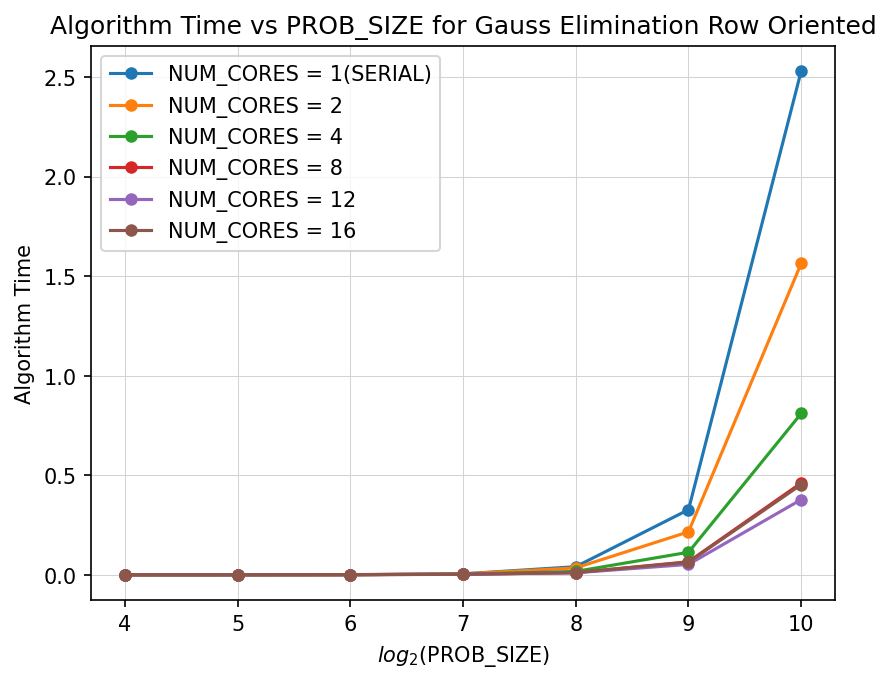

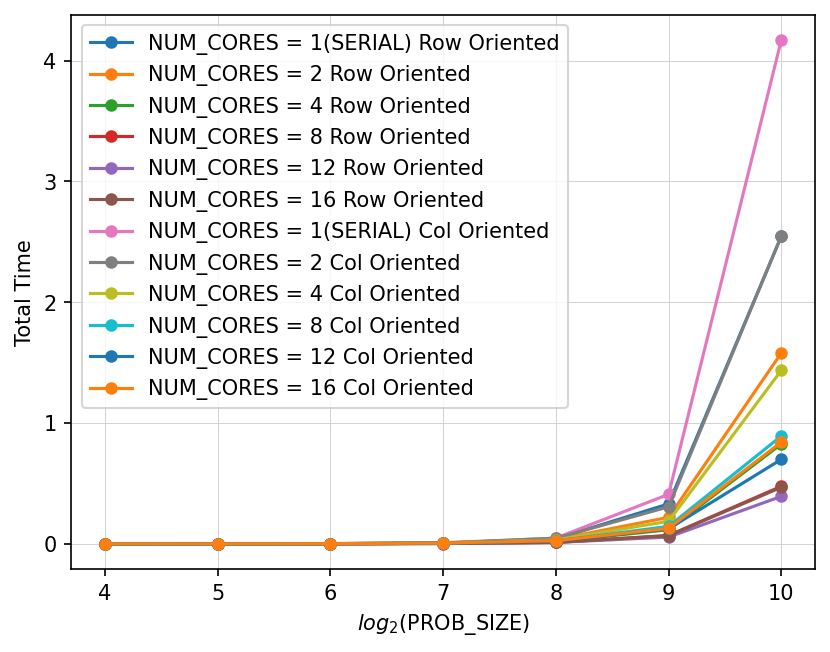

2
4
8
12
16


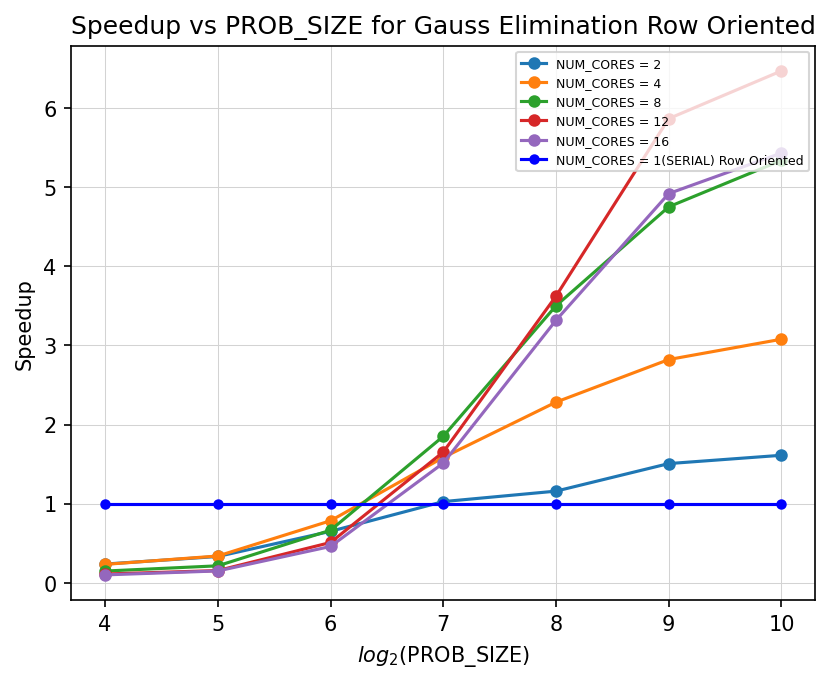

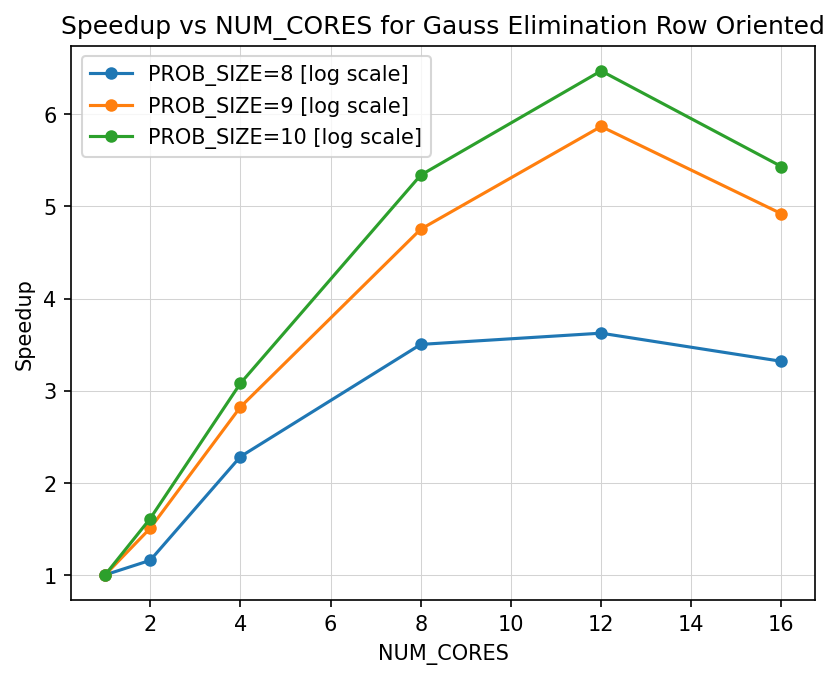

In [9]:
import os 
pwd = os.getcwd()
print(pwd)

path_Q1_row_cluster = pwd + '/Cluster/Row/data.csv'
path_Q1_col_cluster = pwd + '/Cluster/Col/data.csv'

dataQ1_row_cluster = pd.read_csv(path_Q1_row_cluster)
dataQ1_col_cluster = pd.read_csv(path_Q1_col_cluster)

num_cores = [0, 2,4,8,12,16]

dataQ1_row_cluster = dataQ1_row_cluster[dataQ1_row_cluster['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_row_cluster['PROB_NAME'] = 'GAUSS_ELIMINATION'

#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_row_cluster[dataQ1_row_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_clusterrow.png')
plt.show()

    

# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1_row_cluster[dataQ1_row_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i) + ' Row Oriented'
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)' + ' Row Oriented'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],'-o', label = label,markersize=5)
for i in num_cores:
    df = dataQ1_col_cluster[dataQ1_col_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i) + ' Col Oriented'
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)' + ' Col Oriented'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
    
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
# plt.title('Total Time vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_clusterrow.png')
plt.show()



# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1_row_cluster[dataQ1_row_cluster['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1_row_cluster[dataQ1_row_cluster['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

array_speedup = np.array(len(speedup[0])*[1]) # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup,'-o',color = 'blue', label='NUM_CORES = 1(SERIAL) Row Oriented',markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for Gauss Elimination Row Oriented')
# plt.legend()
# decrease font size of legend
plt.legend(loc='upper right', prop={'size': 6})
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_clusterrow.png')
plt.show()
    
    
    
# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**8, 2**9, 2**10]
for p in prob:
    plt.figure(3)
    df = dataQ1_row_cluster[dataQ1_row_cluster['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' + str(int(np.log2(p)))+' [log scale]' , markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_cluster_prrow.png')
plt.show()
    

     
     

/Users/divya/Documents/Semester-6/High Performance Computing /Lab 8


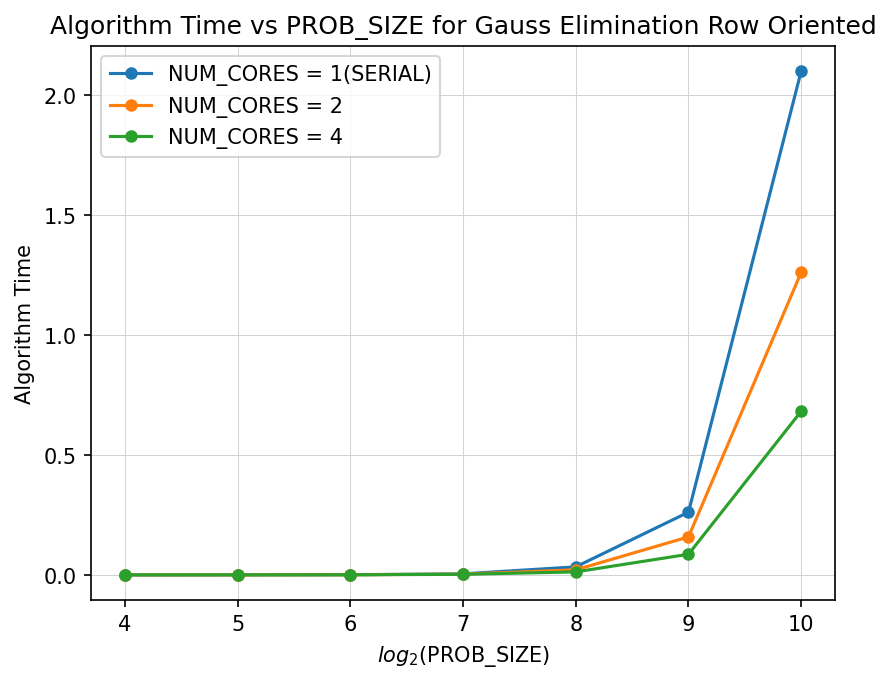

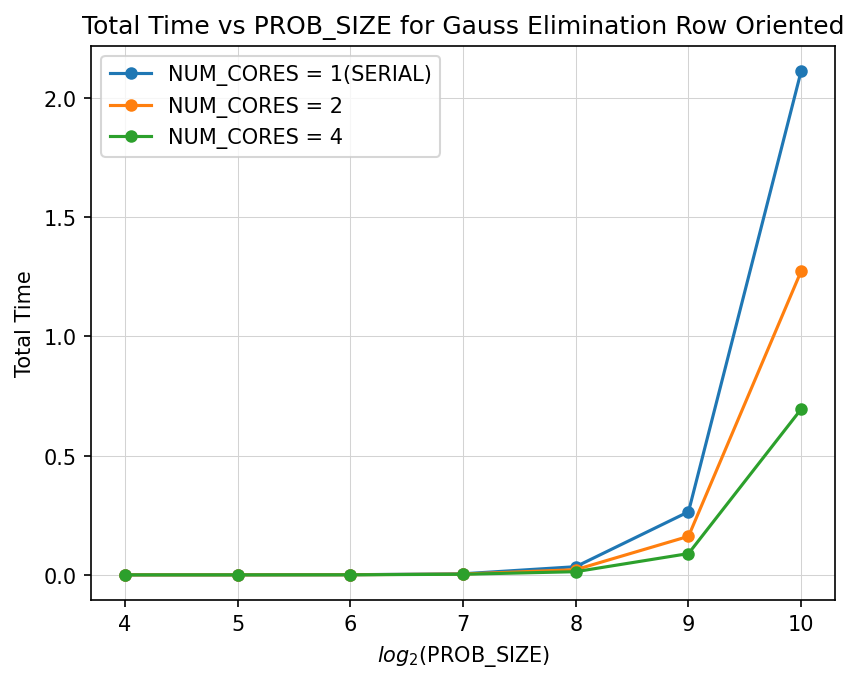

2
4


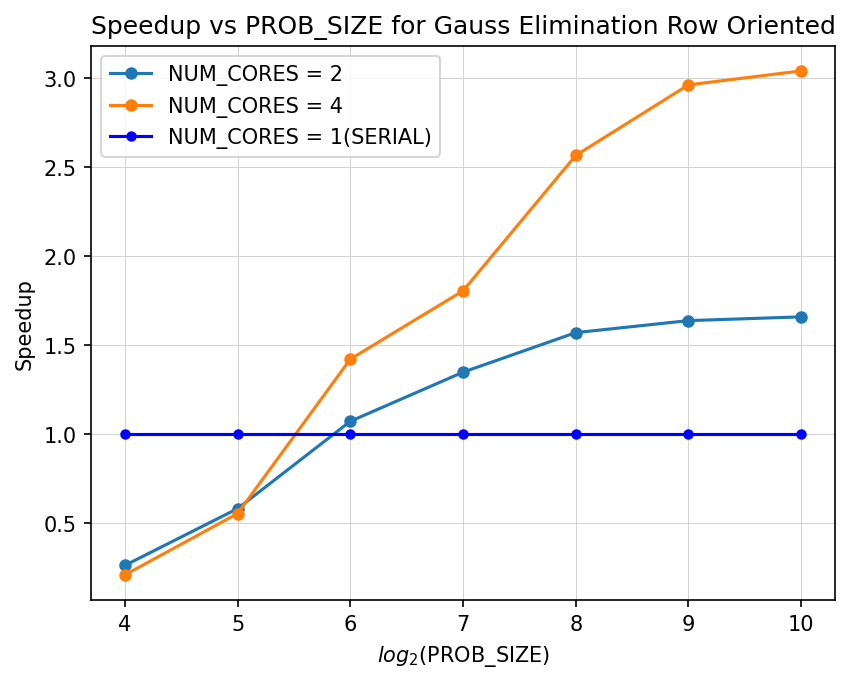

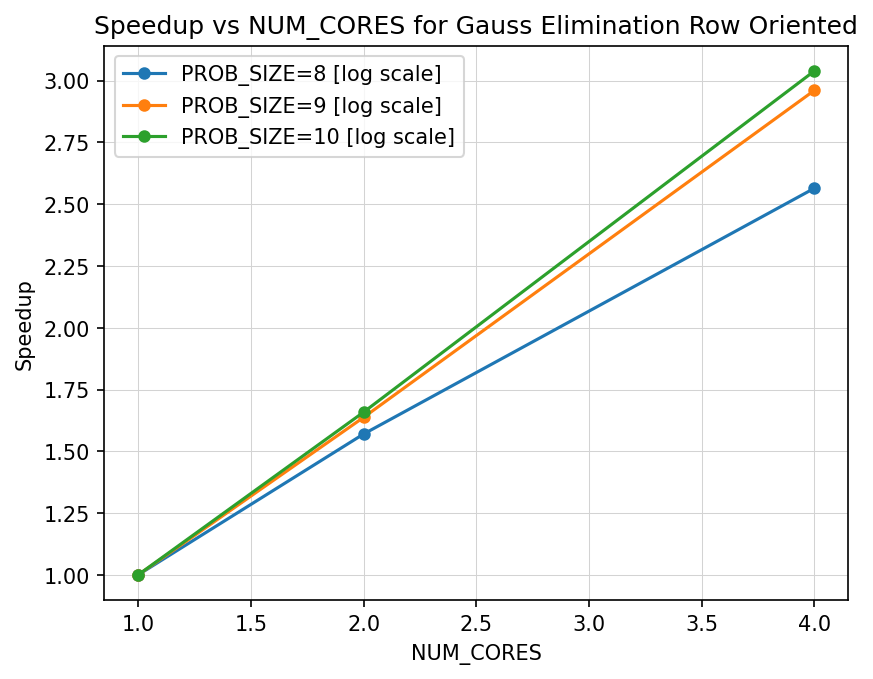

In [3]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1 = pwd + '/Lab PC/Row/data.csv'


dataQ1_row_lab = pd.read_csv(path_Q1)

num_cores = [0, 2, 4]

dataQ1_row_lab = dataQ1_row_lab[dataQ1_row_lab['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_row_lab['PROB_NAME'] = 'GAUSS_ELIMINATION'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_row_lab[dataQ1_row_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_Labrow.png')
plt.show()


# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1_row_lab[dataQ1_row_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_Labrow.png')
plt.show()


plt.figure(2)
speeup = []
df0 = dataQ1_row_lab[dataQ1_row_lab['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1_row_lab[dataQ1_row_lab['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1])  # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup, '-o',
         color='blue', label='NUM_CORES = 1(SERIAL)', markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_labrow.png')
plt.show()


# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**8, 2**9, 2**10]
for p in prob:
    plt.figure(3)
    df = dataQ1_row_lab[dataQ1_row_lab['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' +
             str(int(np.log2(p)))+' [log scale]', markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_labrow.png')
plt.show()


/Users/divya/Documents/Semester-6/High Performance Computing /Lab 8


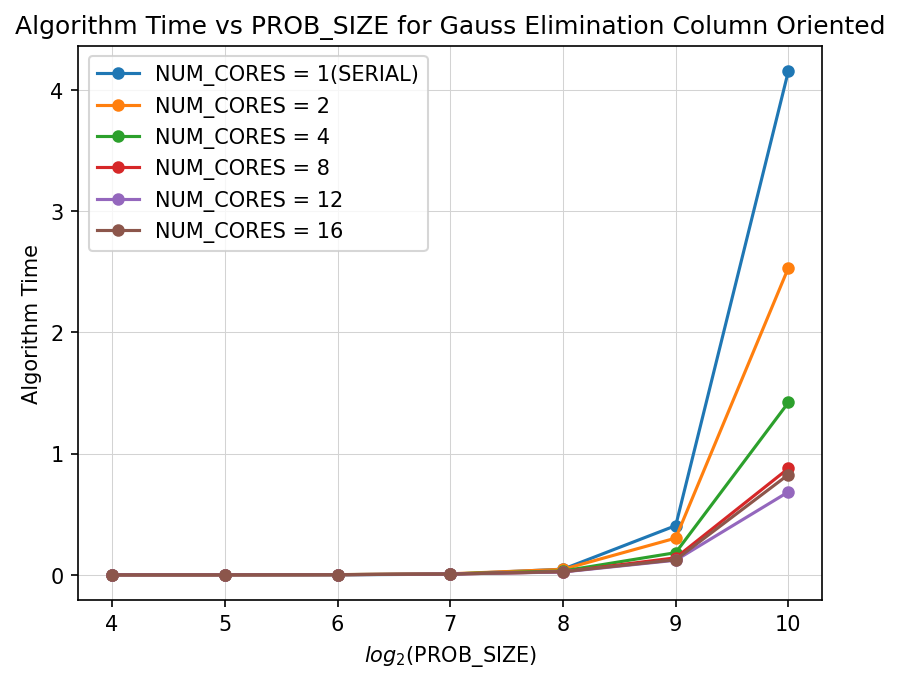

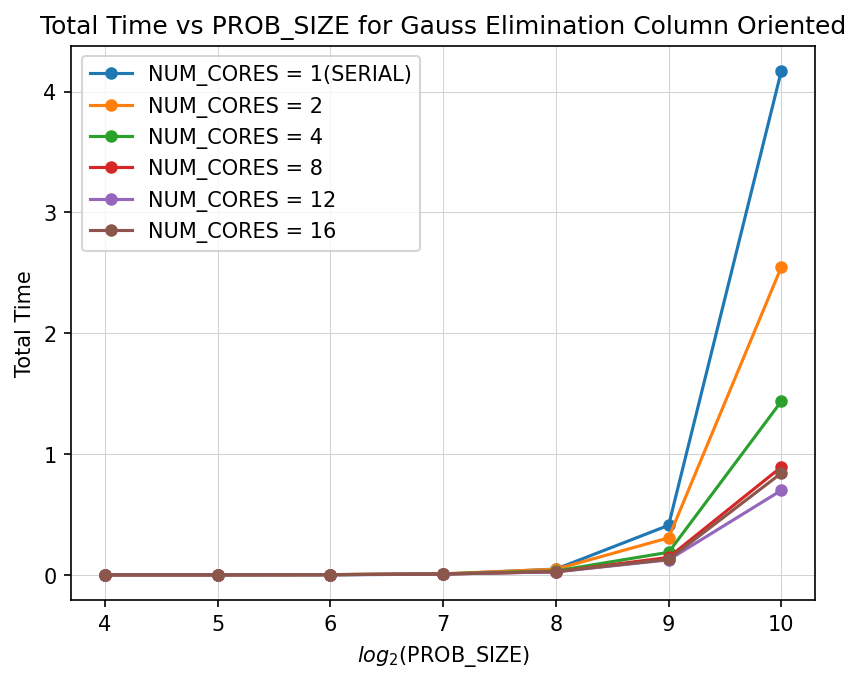

2
4
8
12
16


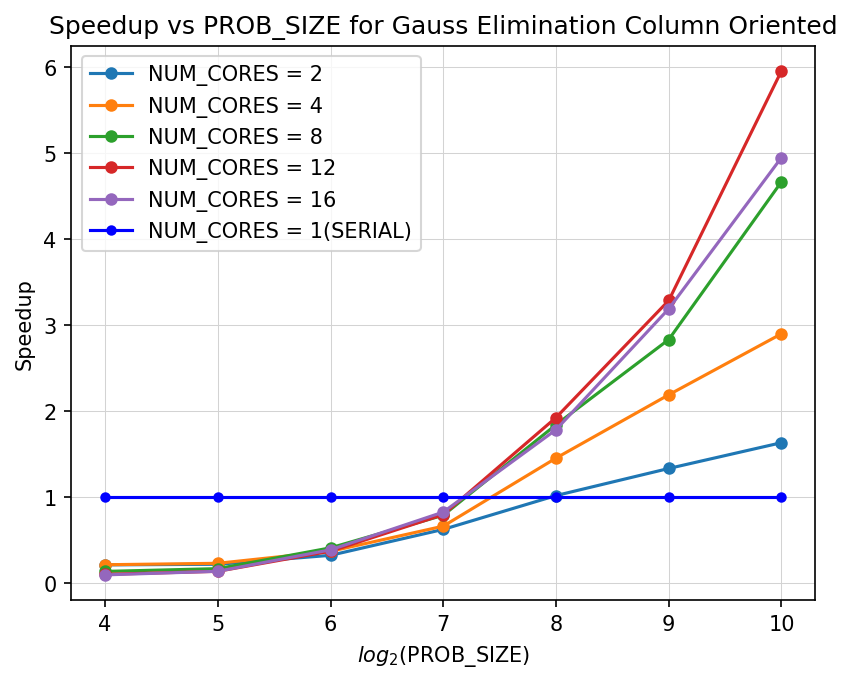

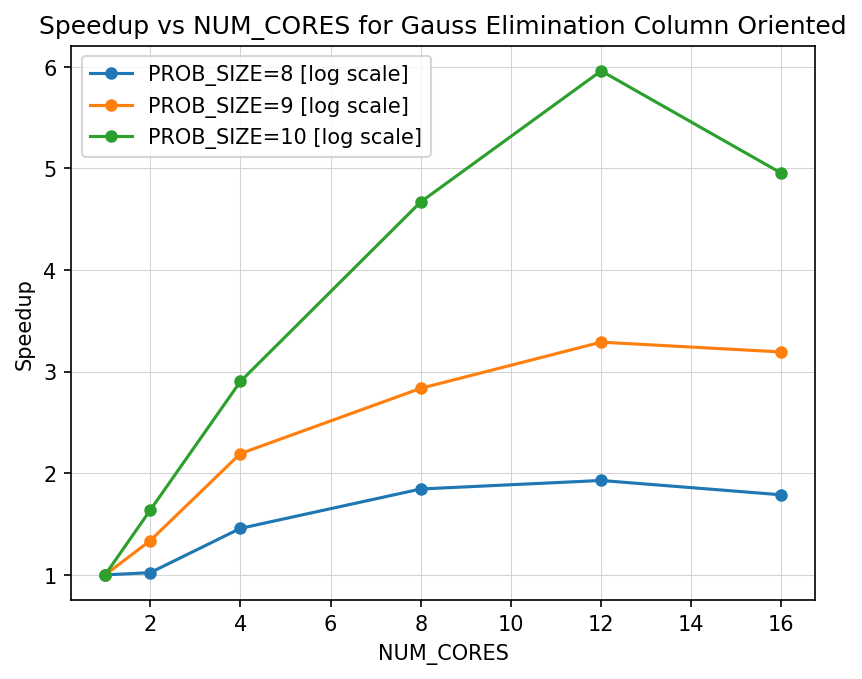

In [4]:
import os 
pwd = os.getcwd()
print(pwd)

path_Q1_col_cluster = pwd + '/Cluster/Col/data.csv'


dataQ1_col_cluster = pd.read_csv(path_Q1_col_cluster)

num_cores = [0, 2,4,8,12,16]

dataQ1_col_cluster = dataQ1_col_cluster[dataQ1_col_cluster['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_col_cluster['PROB_NAME'] = 'GAUSS_ELIMINATION'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_col_cluster[dataQ1_col_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],'-o', label = label,markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_cluster_col.png')
plt.show()

    

# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1_col_cluster[dataQ1_col_cluster['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],'-o', label = label,markersize=5)
    
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_cluster_col.png')
plt.show()

#Q1

# Plot speedup for all number of cores 2,4,8,12,16 [problem_size vs Speedup]
#Q1
plt.figure(2)
speeup = []
df0 = dataQ1_col_cluster[dataQ1_col_cluster['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1_col_cluster[dataQ1_col_cluster['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1]) # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup,'-o',color = 'blue', label='NUM_CORES = 1(SERIAL)',markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_cluster_col.png')
plt.show()
    
    
    
# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**8, 2**9, 2**10]
for p in prob:
    plt.figure(3)
    df = dataQ1_col_cluster[dataQ1_col_cluster['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' + str(int(np.log2(p)))+' [log scale]' , markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_cluster_pr_col.png')
plt.show()
    

     
     

/Users/divya/Documents/Semester-6/High Performance Computing /Lab 8


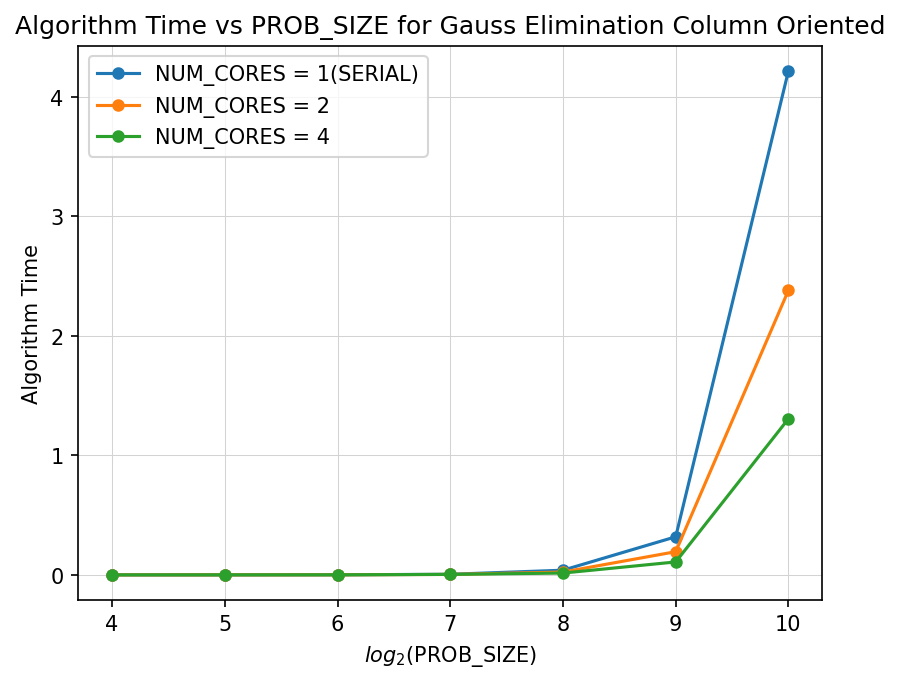

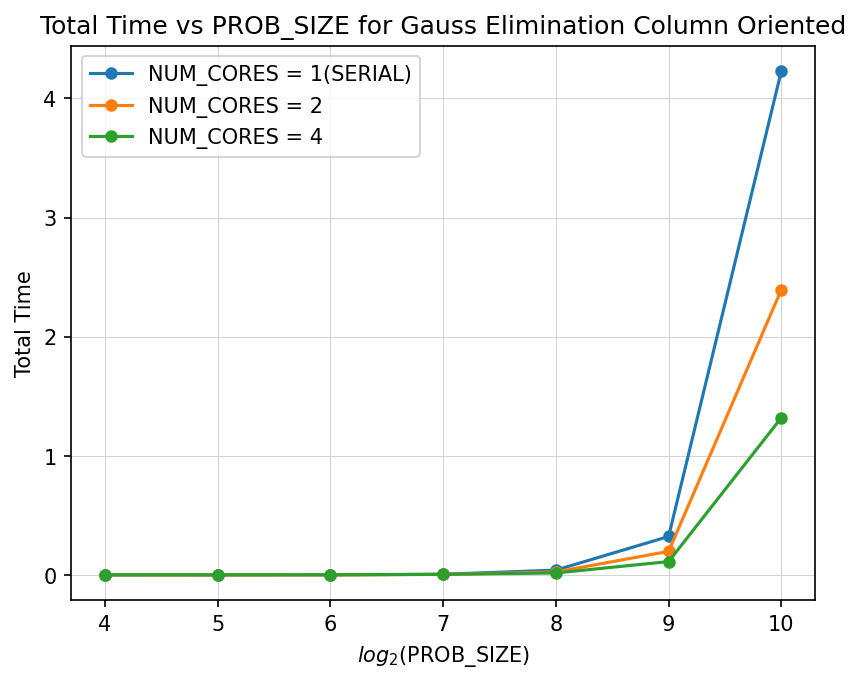

2
4


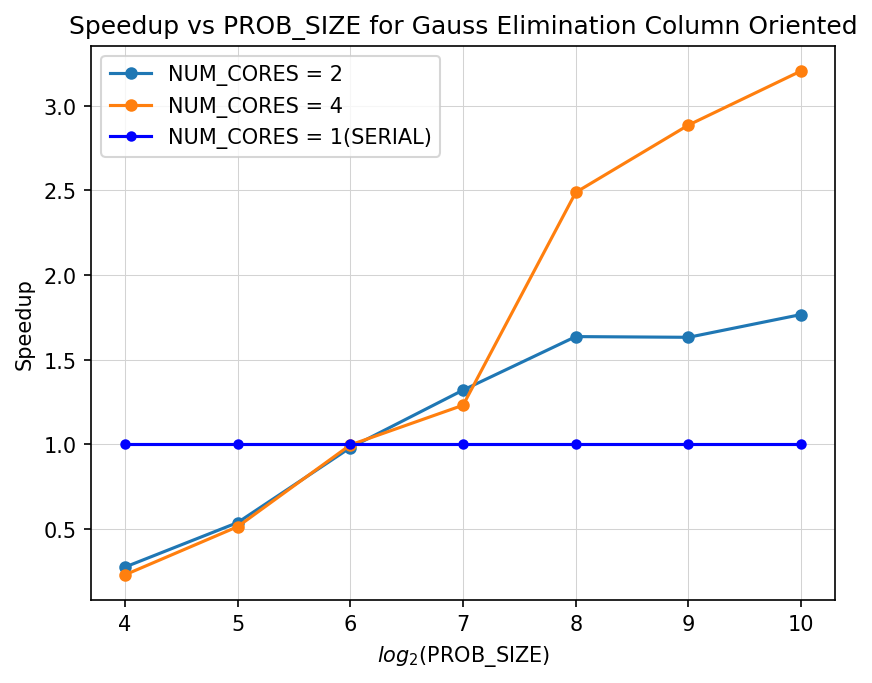

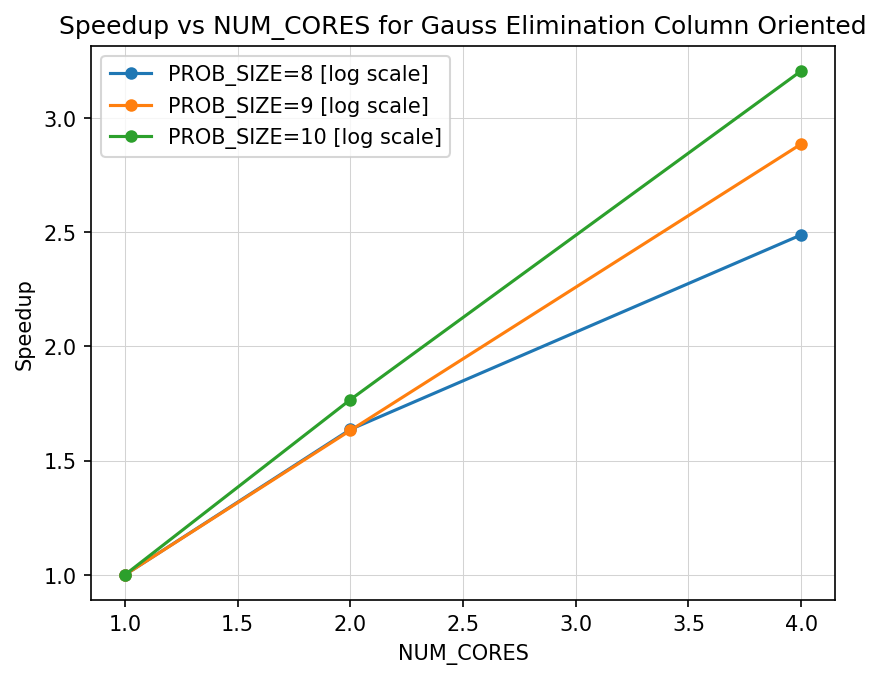

In [5]:
import os
pwd = os.getcwd()
print(pwd)

path_Q1_col_lab = pwd + '/Lab PC/Col/data.csv'


dataQ1_col_lab = pd.read_csv(path_Q1_col_lab)

num_cores = [0, 2, 4]

dataQ1_col_lab = dataQ1_col_lab[dataQ1_col_lab['PROB_SIZE'] <= 2**27]

# Value of all entries in df['PROB_NAME'] in Q1 --> 'PI_TRAPEZOIDAL', Q2 --> 'SUM_VECTORS', Q3 --> 'QUICK_SORT'
dataQ1_col_lab['PROB_NAME'] = 'GAUSS_ELIMINATION'

# Plot df['ALG_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(1)
for i in num_cores:
    df = dataQ1_col_lab[dataQ1_col_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['ALG_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Algorithm Time')
plt.title('Algorithm Time vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1alg_Lab_col.png')
plt.show()


# Plot df['TOTAL_TIME'] vs log2(df['PROB_SIZE']) for all num_cores for Q1, Q2, Q3
#Q1
plt.figure(4)
for i in num_cores:
    df = dataQ1_col_lab[dataQ1_col_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i)
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
plt.title('Total Time vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1tot_Lab_col.png')
plt.show()


plt.figure(2)
speeup = []
df0 = dataQ1_col_lab[dataQ1_col_lab['NUMBER_CORES'] == 0]


speedup = []
for i in num_cores:
    if i == 0:
        continue
    print(i)
    df = dataQ1_col_lab[dataQ1_col_lab['NUMBER_CORES'] == i]
    val0 = df0['TOTAL_TIME'].values
    val = df['TOTAL_TIME'].values
    speedup_i = val0/val
    plt.plot(np.log2(df['PROB_SIZE']), speedup_i, '-o',
             label='NUM_CORES = ' + str(i), markersize=5)
    speedup.append(speedup_i)

# Plot horizontal line for single core (represented by 0)
# plt.axhline(y=1, color='r', linestyle='--', label='NUM_CORES = 0')
array_speedup = np.array(len(speedup[0])*[1])  # array of 1s
plt.plot(np.log2(df['PROB_SIZE']), array_speedup, '-o',
         color='blue', label='NUM_CORES = 1(SERIAL)', markersize=4)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Speedup')
plt.title('Speedup vs PROB_SIZE for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_lab_col.png')
plt.show()


# Plot speedup vs processors for problem size of 2^20, 2^24, 2^27
prob = [2**8, 2**9, 2**10]
for p in prob:
    plt.figure(3)
    df = dataQ1_col_lab[dataQ1_col_lab['PROB_SIZE'] == p]
    speedup = []
    for i in num_cores:
        df1 = df[df['NUMBER_CORES'] == i]
        df0 = df[df['NUMBER_CORES'] == 0]
        val0 = df0['TOTAL_TIME'].values
        val = df1['TOTAL_TIME'].values
        speedup.append(val0/val)
    num_cores[0] = 1
    plt.plot(num_cores[0:], speedup, '-o', label='PROB_SIZE=' +
             str(int(np.log2(p)))+' [log scale]', markersize=5)
    num_cores[0] = 0

plt.xlabel('NUM_CORES')
plt.ylabel('Speedup')
plt.title('Speedup vs NUM_CORES for Gauss Elimination Column Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('Q1speed_proc_lab_col.png')
plt.show()


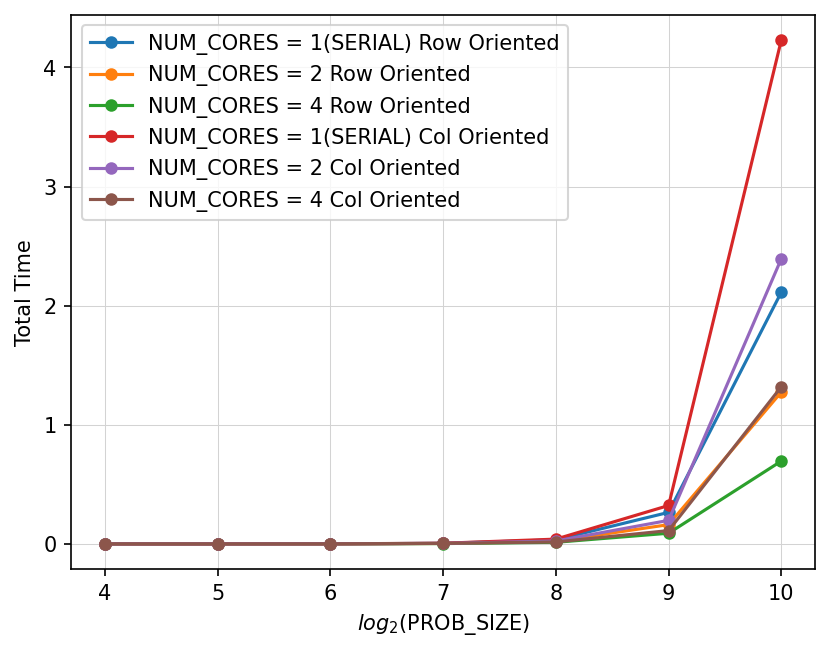

In [8]:
plt.figure(4)
for i in num_cores:
    df = dataQ1_row_lab[dataQ1_row_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i) + ' Row Oriented'
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)' + ' Row Oriented'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)
for i in num_cores:
    df = dataQ1_col_lab[dataQ1_col_lab['NUMBER_CORES'] == i]
    label = 'NUM_CORES = ' + str(i) + ' Col Oriented'
    if i == 0:
        label = 'NUM_CORES = 1(SERIAL)' + ' Col Oriented'
    plt.plot(np.log2(df['PROB_SIZE']), df['TOTAL_TIME'],
             '-o', label=label, markersize=5)

plt.xlabel('$log_2$(PROB_SIZE)')
plt.ylabel('Total Time')
# plt.title('Total Time vs PROB_SIZE for Gauss Elimination Row Oriented')
plt.legend()
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5)
plt.savefig('alll2.png')
plt.show()
